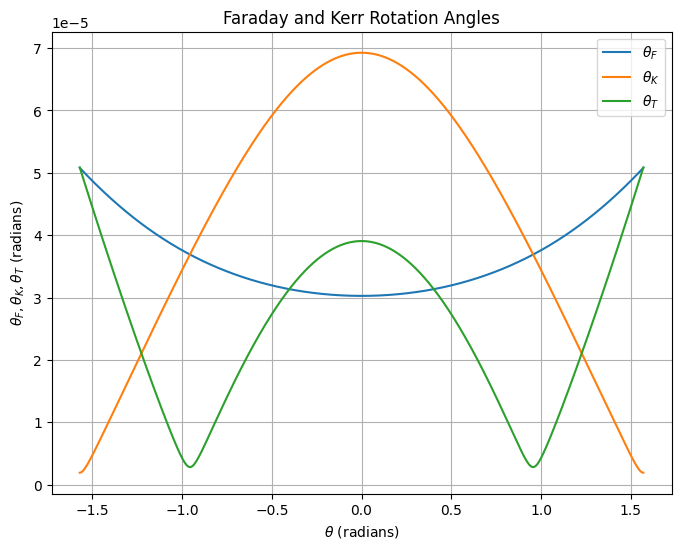

In [20]:
import numpy as np
import matplotlib.pyplot as plt

d = 1e-8

sigma_t = -0.5
sigma_b = 0.5

def mu1(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)
    
def mu3(theta):
    return np.cos(theta)

def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 10nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, sigma_t, sigma_b, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a21 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)  
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a41 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

def a_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a44 - a14 * a43) / (a33 * a44 - a34 * a43)

def b_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a34 - a14 * a33) / (a43 * a34 - a44 * a33)

def a_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a44 - a24 * a43) / (a33 * a44 - a34 * a43)

def b_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a34 - a24 * a33) / (a43 * a34 - a44 * a33)

theta_values = np.linspace(-np.pi * 0.9999 / 2, np.pi * 0.9999 / 2, 1000)
alpha = 7.29735e-3

values_kerr = []
values_faraday = []
values_total = []

for theta in theta_values:
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    tf_value_1 = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    tf_value_2 = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    a1 = a_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
    b1 = b_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
    a2 = a_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
    b2 = b_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
    tf2y_value = elems[4] + elems[5] * tf_value_1 - (a2 * elems[8] + b2 * elems[12] + (a2 * elems[9] + b2 * elems[13]) * tf_value_1)
    tf2x_value = elems[0] + elems[1] * tf_value_1 - (a1 * elems[8] + b1 * elems[12] + (a1 * elems[9] + b1 * elems[13]) * tf_value_1)
    values_total.append(abs(tf2y_value / tf2x_value)) # We're considering the ratio of the amplitudes of E_y and E_x, which is represented by the modulus of tf_value. But actually the imaginary part dominates by 30~40 times.
    values_kerr.append(abs(tf_value_1))
    values_faraday.append(abs(tf_value_2))

plt.figure(figsize=(8, 6))
plt.plot(theta_values, values_faraday, label=r'$\theta_F$')
plt.plot(theta_values, values_kerr, label=r'$\theta_K$')
plt.plot(theta_values, values_total, label=r'$\theta_T$')

plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\theta_F, \theta_K, \theta_T$ (radians)')
plt.title(r'Faraday and Kerr Rotation Angles')
plt.legend()
plt.grid(True)

plt.show()


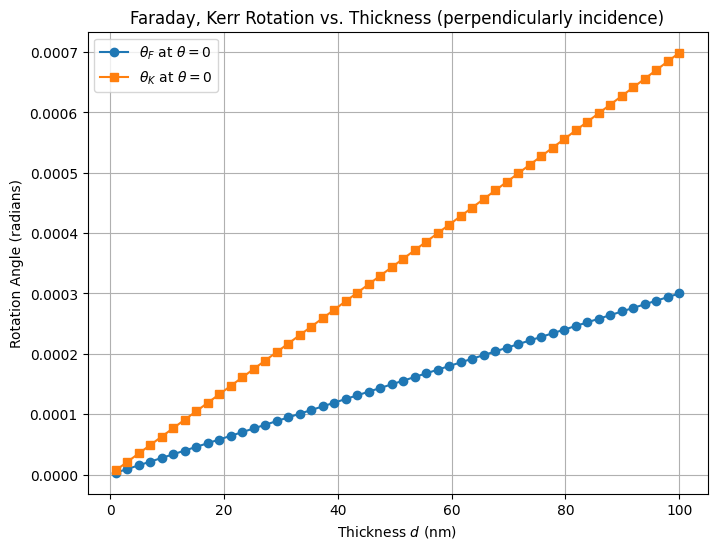

In [2]:
d_values = np.linspace(1e-9, 1e-7, 50)

kerr_values = []
faraday_values = []

theta = 0

for d in d_values:
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    kerr_values.append(abs(kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])))
    faraday_values.append(abs(faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])))

plt.figure(figsize=(8, 6))
plt.plot(d_values * 1e9, faraday_values, label=r'$\theta_F$ at $\theta=0$', marker='o')
plt.plot(d_values * 1e9, kerr_values, label=r'$\theta_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('Rotation Angle (radians)')
plt.title('Faraday, Kerr Rotation vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)
plt.show()


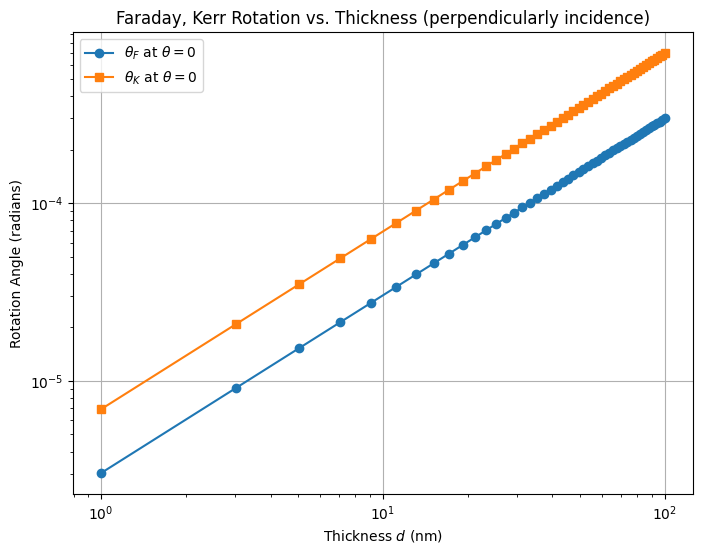

In [3]:
plt.figure(figsize=(8, 6))
plt.loglog(d_values * 1e9, faraday_values, label=r'$\theta_F$ at $\theta=0$', marker='o')
plt.loglog(d_values * 1e9, kerr_values, label=r'$\theta_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('Rotation Angle (radians)')
plt.title('Faraday, Kerr Rotation vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)
plt.show()

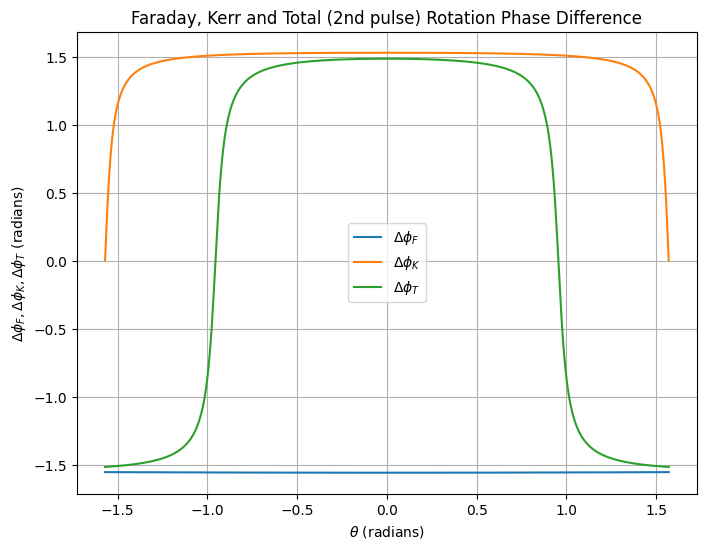

In [43]:
import numpy as np
import matplotlib.pyplot as plt

d = 1e-8

sigma_t = -0.5
sigma_b = 0.5

def mu1(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)

def mu3(theta):
    return np.cos(theta)
    
def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 5nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, sigma_t, sigma_b, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a21 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)  
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a41 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

def a_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a44 - a14 * a43) / (a33 * a44 - a34 * a43)

def b_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a34 - a14 * a33) / (a43 * a34 - a44 * a33)

def a_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a44 - a24 * a43) / (a33 * a44 - a34 * a43)

def b_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a34 - a24 * a33) / (a43 * a34 - a44 * a33)

theta_values = np.linspace(-np.pi * 0.9999 / 2, np.pi * 0.9999 / 2, 1000)
alpha = 7.29735e-3

phasediff_kerr = []
phasediff_faraday = []
phasediff_total = []

for theta in theta_values:
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    tf_value_1 = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    tf_value_2 = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    a1 = a_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
    b1 = b_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
    a2 = a_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
    b2 = b_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
    tf2y_value = elems[4] + elems[5] * tf_value_1 - (a2 * elems[8] + b2 * elems[12] + (a2 * elems[9] + b2 * elems[13]) * tf_value_1)
    tf2x_value = elems[0] + elems[1] * tf_value_1 - (a1 * elems[8] + b1 * elems[12] + (a1 * elems[9] + b1 * elems[13]) * tf_value_1)
    tf_value_3 = tf2y_value / tf2x_value
    phasediff_kerr.append(np.arctan(tf_value_1.imag / tf_value_1.real))
    phasediff_faraday.append(np.arctan(tf_value_2.imag / tf_value_2.real))
    phasediff_total.append(np.arctan(tf_value_3.imag / tf_value_3.real))

plt.figure(figsize=(8, 6))
plt.plot(theta_values, phasediff_faraday, label=r'$\Delta\phi_F$')
plt.plot(theta_values, phasediff_kerr, label=r'$\Delta\phi_K$')
plt.plot(theta_values, phasediff_total, label=r'$\Delta\phi_T$')

plt.xlabel(r'$\theta$ (radians)')
plt.ylabel(r'$\Delta\phi_F, \Delta\phi_K, \Delta\phi_T$ (radians)')
plt.title(r'Faraday, Kerr and Total (2nd pulse) Rotation Phase Difference')
plt.legend()
plt.grid(True)

plt.show()


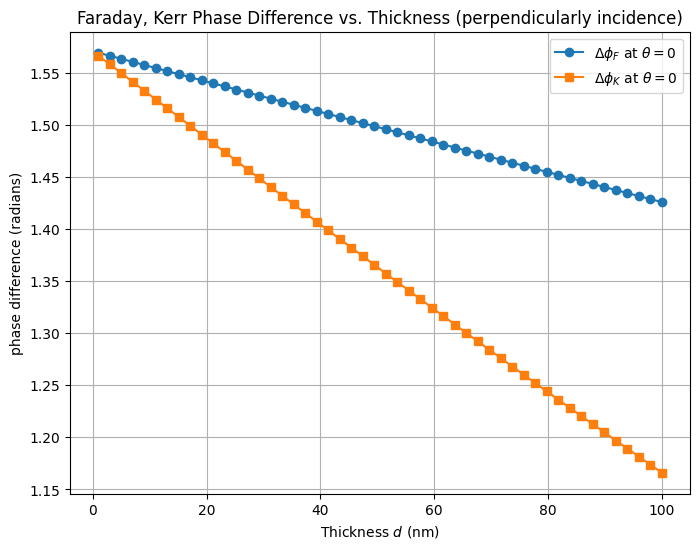

In [5]:
phase_kerr = []
phase_faraday = []

theta = 0

for d in d_values:
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    tfk_value = kerr_function(elems[12], elems[10], elems[8], elems[14], elems[15], elems[11])
    tff_value = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
    phase_kerr.append(np.arctan(tfk_value.imag / tfk_value.real))
    phase_faraday.append(-np.arctan(tff_value.imag / tff_value.real))

plt.figure(figsize=(8, 6))
plt.plot(d_values * 1e9, phase_faraday, label=r'$\Delta\phi_F$ at $\theta=0$', marker='o')
plt.plot(d_values * 1e9, phase_kerr, label=r'$\Delta\phi_K$ at $\theta=0$', marker='s')
plt.xlabel('Thickness $d$ (nm)')
plt.ylabel('phase difference (radians)')
plt.title('Faraday, Kerr Phase Difference vs. Thickness (perpendicularly incidence)')
plt.legend()
plt.grid(True)

plt.show()

<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:76: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:74: SyntaxWarning: invalid escape sequence '\s'
<>:76: SyntaxWarning: invalid escape sequence '\s'
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\2284733609.py:73: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('$\sigma_t$')
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\2284733609.py:74: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma_b$')
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\2284733609.py:76: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('Phase difference vs $\sigma_t$ and $\sigma_b$')


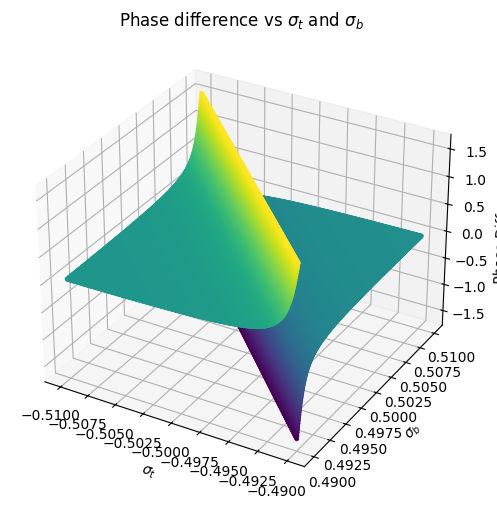

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d = 1e-8

theta = 0

def mu1(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)

def mu3(theta):
    return np.cos(theta)

def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 10nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, sigma_t, sigma_b, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a21 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)  
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a41 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

sigma_t_min, sigma_t_max = -0.51, -0.49
sigma_b_min, sigma_b_max = 0.49, 0.51
num_points = 500

alpha = 7.29735e-3

sigma_t_range = np.linspace(sigma_t_min, sigma_t_max, num_points)
sigma_b_range = np.linspace(sigma_b_min, sigma_b_max, num_points)

X_list, Y_list, phasediff_faraday = [], [], []

for sigma_t in sigma_t_range:
    for sigma_b in sigma_b_range:
        X_list.append(sigma_t)
        Y_list.append(sigma_b)
        elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
        tf_value = faraday_function(elems[0], elems[2], elems[3], elems[4], elems[6], elems[7], elems[8], elems[10], elems[11], elems[12], elems[14], elems[15])
        phasediff_faraday.append(np.arctan(tf_value.imag / tf_value.real))

X = np.array(X_list)
Y = np.array(Y_list)
Z = np.array(phasediff_faraday)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', s=5)

ax.set_xlabel('$\sigma_t$')
ax.set_ylabel('$\sigma_b$')
ax.set_zlabel('Phase Difference')
ax.set_title('Phase difference vs $\sigma_t$ and $\sigma_b$')

plt.show()


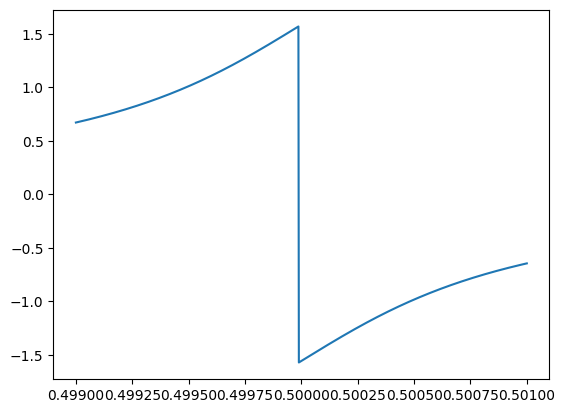

In [24]:
sigma_b_values = np.linspace(0.499, 0.501, 1000)

Phasediff_faraday = []
for sigma_b in sigma_b_values:
    sigma_t = -0.5
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    tf_value = faraday_function(elems[0], elems[1], elems[2], elems[3], elems[4], elems[5], elems[6], elems[7], elems[8], elems[9], elems[10], elems[11])
    Phasediff_faraday.append(np.arctan(tf_value.imag / tf_value.real))

plt.plot(sigma_b_values, Phasediff_faraday)

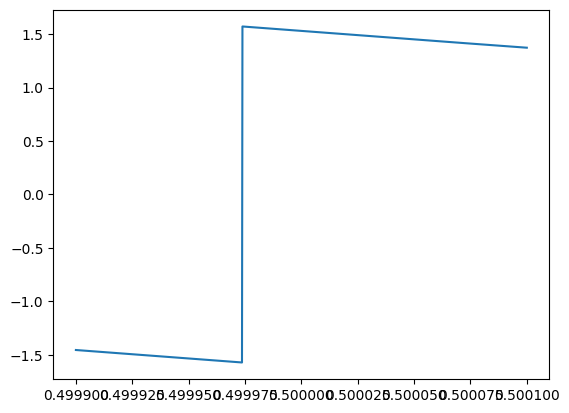

In [26]:
sigma_b_values = np.linspace(0.4999, 0.5001, 1000)

Phasediff_kerr = []
for sigma_b in sigma_b_values:
    sigma_t = -0.5
    elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
    tf_value = kerr_function(elems[9], elems[7], elems[6], elems[10], elems[11], elems[8])
    Phasediff_kerr.append(np.arctan(tf_value.imag / tf_value.real))

plt.plot(sigma_b_values, Phasediff_kerr)

<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:97: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
<>:96: SyntaxWarning: invalid escape sequence '\s'
<>:97: SyntaxWarning: invalid escape sequence '\s'
<>:99: SyntaxWarning: invalid escape sequence '\s'
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\1154739066.py:96: SyntaxWarning: invalid escape sequence '\s'
  ax.set_xlabel('$\sigma_t$')
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\1154739066.py:97: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('$\sigma_b$')
C:\Users\10242\AppData\Local\Temp\ipykernel_17632\1154739066.py:99: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('Total Phase difference (2nd pulse) vs $\sigma_t$ and $\sigma_b$')


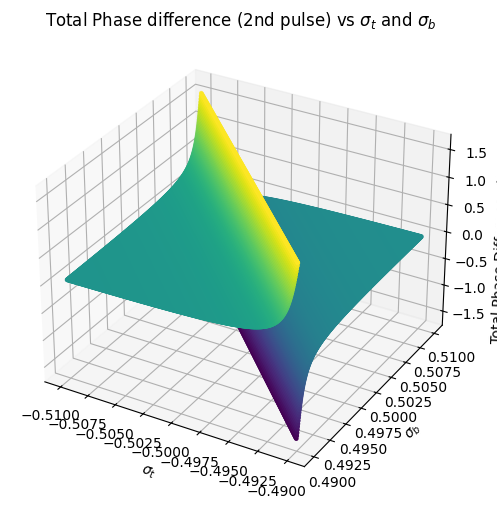

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

d = 1e-8

theta = 0

def mu1(theta):
    return np.sqrt(3.46**2 - np.sin(theta)**2)

def mu2(theta):
    return np.sqrt(10**2 - np.sin(theta)**2)

def mu3(theta):
    return np.cos(theta)

def k_prime_d(theta, d):
    return (2 * np.pi * 3e12 / 3e8) * 10**2 * d / np.sqrt(10**2 - np.sin(theta)**2) # thickness is 10nm, frequency is 3THz, refractive index is 10.

def matrix_elements(theta, alpha, sigma_t, sigma_b, d):
    m1, m2, m3 = mu1(theta), mu2(theta), mu3(theta)
    kpd = k_prime_d(theta, d)
    
    a11 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a12 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a13 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a14 = -2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a21 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a22 = (1 + m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a23 = 2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a24 = (1 - m1 / m3) * np.cos(kpd) + 1j * (-4 * alpha**2 * sigma_t * sigma_b * m1**2 + m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)  
    a31 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a32 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * (m1 * sigma_b - m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a33 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    a34 = 2 * alpha * (sigma_b + sigma_t) / m3 * np.cos(kpd) - 1j * 2 * alpha * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a41 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (-m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a42 = (1 - m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 + m1 * m3) / (m2 * m3) * np.sin(kpd)
    a43 = -2 * alpha * m1**2 * (sigma_b + sigma_t) / m3 * np.cos(kpd) + 1j * 2 * alpha * m1**2 * (m1 * sigma_b + m3 * sigma_t) / (m2 * m3) * np.sin(kpd)
    a44 = (1 + m1 / m3) * np.cos(kpd) + 1j * (4 * alpha**2 * sigma_t * sigma_b * m1**2 - m2**2 - m1 * m3) / (m2 * m3) * np.sin(kpd)
    
    return a11, a12, a13, a14, a21, a22, a23, a24, a31, a32, a33, a34, a41, a42, a43, a44

def kerr_function(a41, a33, a31, a43, a44, a34):
    return (a41 * a33 - a31 * a43) / (a31 * a44 - a41 * a34)

def faraday_function(a11, a13, a14, a21, a23, a24, a31, a33, a34, a41, a43, a44):
    return (a21 * (a34 * a43 - a33 * a44) + a23 * (a31 * a44 - a41 * a34) + a24 * (a41 * a33 - a31 * a43)) / (a11 * (a34 * a43 - a33 * a44) + a13 * (a31 * a44 - a41 * a34) + a14 * (a41 * a33 - a31 * a43))

def a_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a44 - a14 * a43) / (a33 * a44 - a34 * a43)

def b_1(a13, a14, a33, a34, a43, a44):
    return (a13 * a34 - a14 * a33) / (a43 * a34 - a44 * a33)

def a_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a44 - a24 * a43) / (a33 * a44 - a34 * a43)

def b_2(a23, a24, a33, a34, a43, a44):
    return (a23 * a34 - a24 * a33) / (a43 * a34 - a44 * a33)

sigma_t_min, sigma_t_max = -0.51, -0.49
sigma_b_min, sigma_b_max = 0.49, 0.51
num_points = 500

alpha = 7.29735e-3

sigma_t_range = np.linspace(sigma_t_min, sigma_t_max, num_points)
sigma_b_range = np.linspace(sigma_b_min, sigma_b_max, num_points)

X_list, Y_list, phasediff_total = [], [], []

for sigma_t in sigma_t_range:
    for sigma_b in sigma_b_range:
        X_list.append(sigma_t)
        Y_list.append(sigma_b)
        elems = matrix_elements(theta, alpha, sigma_t, sigma_b, d)
        a1 = a_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
        b1 = b_1(elems[2], elems[3], elems[10], elems[11], elems[14], elems[15])
        a2 = a_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
        b2 = b_2(elems[6], elems[7], elems[10], elems[11], elems[14], elems[15])
        tf2y_value = elems[4] + elems[5] * tf_value_1 - (a2 * elems[8] + b2 * elems[12] + (a2 * elems[9] + b2 * elems[13]) * tf_value_1)
        tf2x_value = elems[0] + elems[1] * tf_value_1 - (a1 * elems[8] + b1 * elems[12] + (a1 * elems[9] + b1 * elems[13]) * tf_value_1)
        tf_value = tf2y_value / tf2x_value
        phasediff_total.append(np.arctan(tf_value.imag / tf_value.real))

X = np.array(X_list)
Y = np.array(Y_list)
Z = np.array(phasediff_total)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=Z, cmap='viridis', marker='o', s=5)

ax.set_xlabel('$\sigma_t$')
ax.set_ylabel('$\sigma_b$')
ax.set_zlabel('Total Phase Difference (2nd pulse)')
ax.set_title('Total Phase difference (2nd pulse) vs $\sigma_t$ and $\sigma_b$')

plt.show()
